# Notebook: Airbnb_Italy_Exploratory_Data_Analysis - Jessica Gatta.ipynb

### -----------------------------------------------------------
### Title: Airbnb Italy - Exploratory Data Analysis - Jessica Gatta
### -----------------------------------------------------------

### Introduction:

In this notebook, I explore the cleaned Airbnb Italy dataset to uncover insights about property features, host characteristics, and listing performance across Italian cities.  
As a host myself, this analysis is particularly meaningful — I aim to understand what makes listings successful on Airbnb and how variables such as price, ratings, and host experience interact.  

The main goal is to visualize relationships between variables, detect trends, and start forming hypotheses for further analysis.

### Load Libraries and Dataset

In [30]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [2]:
path = r'C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\Achievement 6\10-2025 Italian Airbnb'

In [3]:
df_airbnb = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'italian_airbnbs_cleaned.csv'))

In [5]:
# Initial check
df_airbnb.info()
df_airbnb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92163 entries, 0 to 92162
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               92163 non-null  int64  
 1   listings_id              92163 non-null  int64  
 2   last_year_reviews        92163 non-null  int64  
 3   host_since               92163 non-null  object 
 4   host_is_superhost        92163 non-null  object 
 5   host_number_of_listings  92163 non-null  float64
 6   neighbourhood            92163 non-null  object 
 7   beds_number              92163 non-null  float64
 8   bedrooms_number          92163 non-null  float64
 9   property_type            92163 non-null  object 
 10  maximum_allowed_guests   92163 non-null  int64  
 11  price                    92163 non-null  float64
 12  total_reviews            92163 non-null  int64  
 13  rating_score             92163 non-null  float64
 14  accuracy_score        

,Unnamed: 0,listings_id,last_year_reviews,host_since,host_is_superhost,host_number_of_listings,neighbourhood,beds_number,bedrooms_number,property_type,maximum_allowed_guests,price,total_reviews,rating_score,accuracy_score,cleanliness_score,checkin_score,communication_score,location_score,value_for_money_score,reviews_per_month,city,season,bathrooms_number,bathrooms_type,coordinates,date_of_scraping,latitude,longitude,is_top_host,log_price,host_experience_years
0,0,31840,6,2011-02-07,Host,44.0,Centro Storico,1.0,1.0,Private room,2,89.0,128,4.65,4.73,4.86,4.85,4.91,4.91,4.70,0.78,Firenze,Early Winter,1,private,"43.77709, 11.25216",2024-12-15,43.77709,11.25216,0.0,4.499810,13.863014
1,1,222527,0,2011-07-11,Superhost,3.0,Rifredi,3.0,2.0,Entire home,4,300.0,284,4.85,4.88,4.88,4.99,4.96,4.60,4.86,1.92,Firenze,Early Winter,1,private,"43.82005, 11.22004",2024-12-15,43.82005,11.22004,1.0,5.707110,13.441096
2,2,32120,6,2010-03-26,Host,1.0,Gavinana Galluzzo,1.0,1.0,Entire home,2,95.0,26,4.88,4.88,4.88,4.84,4.96,4.63,4.63,0.16,Firenze,Early Winter,1,private,"43.76157, 11.27741",2024-12-15,43.76157,11.27741,0.0,4.564348,14.734247
3,3,224562,9,2011-09-16,Host,2.0,Centro Storico,1.0,1.0,Entire home,4,60.0,101,4.66,4.75,4.71,4.76,4.83,4.93,4.64,0.71,Firenze,Early Winter,1,private,"43.772, 11.26142",2024-12-15,43.77200,11.26142,0.0,4.110874,13.257534
4,4,32180,11,2014-04-05,Superhost,1.0,Centro Storico,4.0,2.0,Entire home,4,105.0,34,4.76,4.81,4.84,4.81,4.71,4.81,4.84,0.21,Firenze,Early Winter,2,private,"43.76832, 11.24348",2024-12-15,43.76832,11.24348,1.0,4.663439,10.704110


### Data Overview (Descriptive Statistics)

In [6]:
# Summary of numeric variables
df_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,92163.0,1.201697e+05,7.837707e+04,0.000000,5.076850e+04,1.226450e+05,1.667135e+05,2.820460e+05
listings_id,92163.0,4.796850e+17,4.812836e+17,2737.000000,2.579762e+07,5.889409e+17,9.499597e+17,1.243448e+18
last_year_reviews,92163.0,1.432466e+01,2.073766e+01,0.000000,1.000000e+00,5.000000e+00,1.900000e+01,7.780000e+02
host_number_of_listings,92163.0,3.018890e+01,1.100056e+02,1.000000,1.000000e+00,3.000000e+00,1.000000e+01,5.676000e+03
beds_number,92163.0,2.041958e+00,1.306855e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
bedrooms_number,92163.0,1.342849e+00,6.247211e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00
maximum_allowed_guests,92163.0,3.581372e+00,1.798630e+00,1.000000,2.000000e+00,4.000000e+00,4.000000e+00,1.600000e+01
price,92163.0,1.405095e+02,1.404766e+02,8.000000,7.900000e+01,1.050000e+02,1.530000e+02,2.743000e+03
total_reviews,92163.0,4.760794e+01,8.637956e+01,1.000000,3.000000e+00,1.200000e+01,5.100000e+01,1.879000e+03
rating_score,92163.0,4.708173e+00,4.497324e-01,0.000000,4.620000e+00,4.840000e+00,5.000000e+00,5.000000e+00


### Interpretation of Descriptive Statistics

The descriptive statistics provide an overview of the numeric features in the dataset, revealing trends and variability:

- **Price**: Ranges from €8 to €2,743, with an average of €140, indicating variability across property types, locations, and sizes.
- **Number of Reviews**: The total reviews per listing average around 48, while reviews per month average 1.77, showing that some listings are much more active than others.
- **Ratings**: Scores such as `accuracy_score`, `cleanliness_score`, `communication_score`, etc., have high averages (mostly above 4.6), meaning most listings perform well across these quality dimensions.
- **Host Experience**: `host_experience_years` ranges from 0 to ~16 years, reflecting a mix of new and long-time hosts.
- **Top Hosts**: Approximately 31% of listings are managed by Superhosts, providing insight into host performance distribution.
- **Geography**: Latitude and longitude confirm that listings cover various Italian regions, which may explain variability in price and guest capacity.
- **Observations**: Minimum values of 0 in some columns (like bathrooms, beds) may indicate missing or default values, and extreme maximums reveal outliers (e.g., large villas with many guests).

### Correlation Matrix Heatmap

 I am exploring how numeric variables relate to each other. This helps identify strong positive or negative relationships that I might investigate further with scatterplots or regression analysis.

In [13]:
# Select numeric columns
numeric_cols = ['beds_number', 'bedrooms_number', 'maximum_allowed_guests', 
                'price', 'log_price', 'total_reviews', 'rating_score', 'accuracy_score',
                'cleanliness_score', 'checkin_score', 'communication_score', 
                'location_score', 'value_for_money_score', 'reviews_per_month',
                'host_number_of_listings', 'bathrooms_number', 'host_experience_years', 'is_top_host']

In [14]:
# Compute correlation
corr = df_airbnb[numeric_cols].corr()

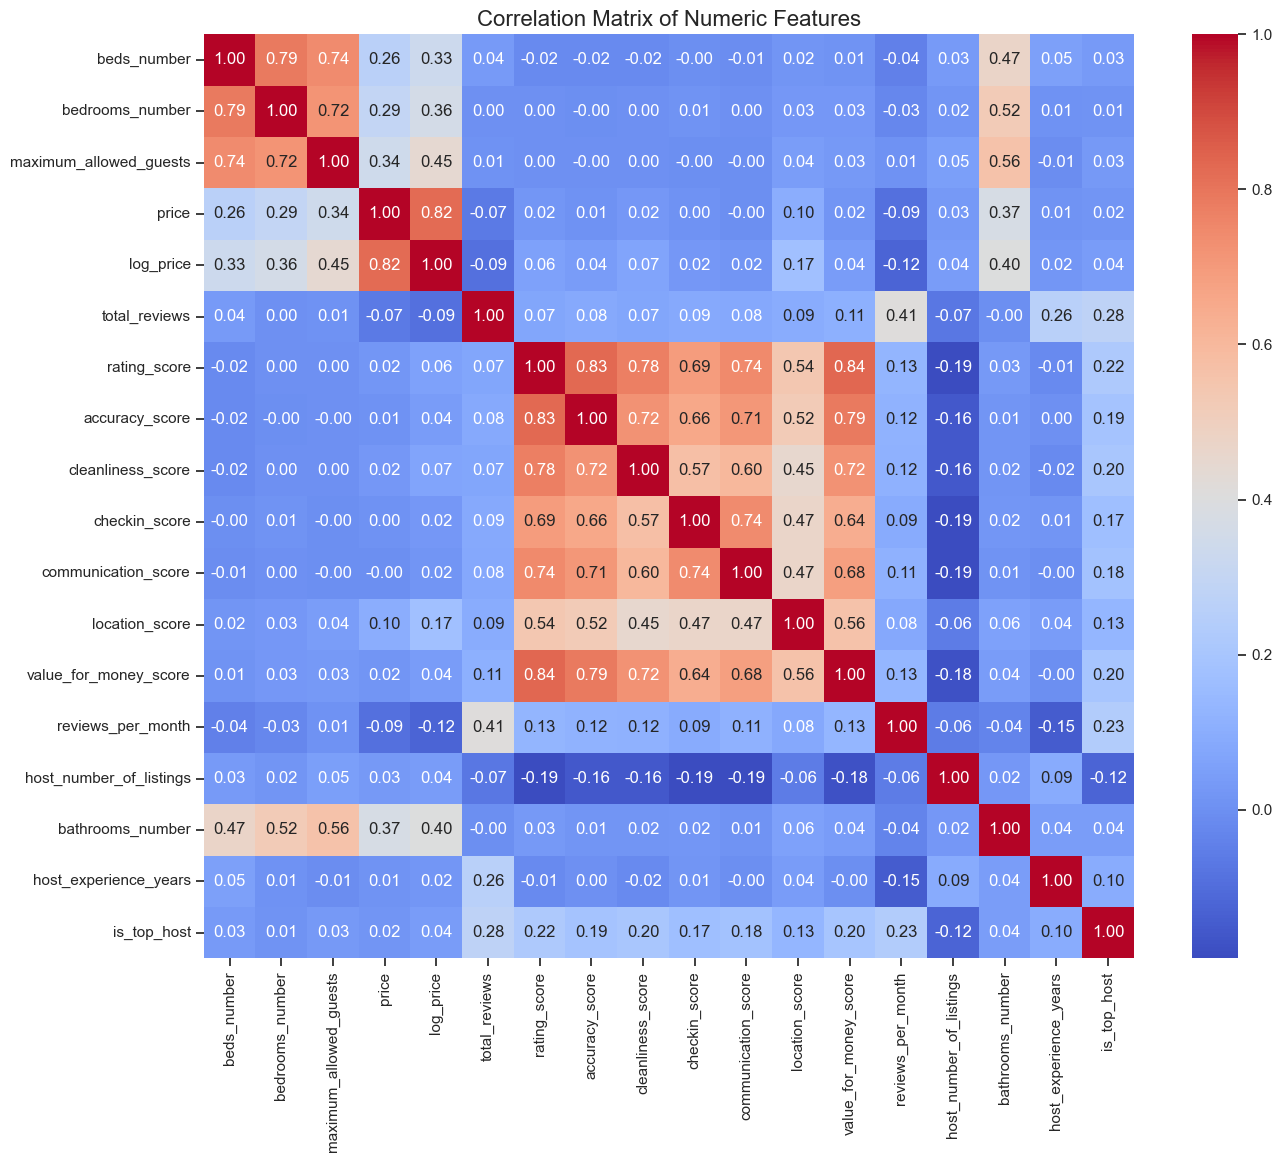

In [52]:
# Plot heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.savefig(r"C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\Achievement 6\10-2025 Italian Airbnb\04 Analysis\Visualizations\correlation_matrix.png", 
            dpi=300, bbox_inches='tight')
plt.show()

### Interpretation
- **High correlations** are observed between `rating_score` and other review-related scores such as `cleanliness_score` and `communication_score`.
- `price` is **moderately correlated** with `maximum_allowed_guests` and `beds_number`, suggesting larger properties tend to be more expensive.
- `host_experience_years` has **low correlation** with price and reviews, indicating host experience does not strongly influence pricing or review counts.
- These insights guide which scatterplots to create next for deeper exploration.

### Scatterplots for Strong Correlations

I selected variables with the strongest correlations from the heatmap to explore their relationships visually.

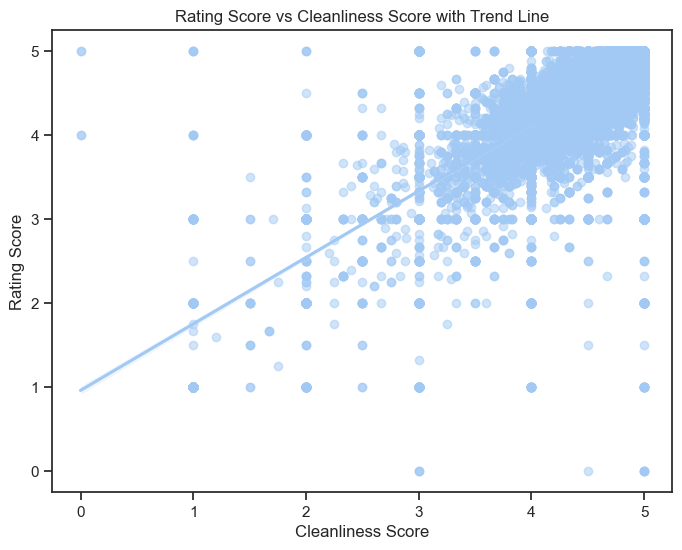

In [58]:
# Scatterplot: Rating Score vs Cleanliness Score
plt.figure(figsize=(8,6))
sns.regplot(data=df_airbnb, x='cleanliness_score', y='rating_score', scatter_kws={'alpha':0.5})
plt.title("Rating Score vs Cleanliness Score with Trend Line")
plt.xlabel("Cleanliness Score")
plt.ylabel("Rating Score")
plt.savefig(r"C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\Achievement 6\10-2025 Italian Airbnb\04 Analysis\Visualizations\rating_score1.png", 
            dpi=300, bbox_inches='tight')
plt.show()

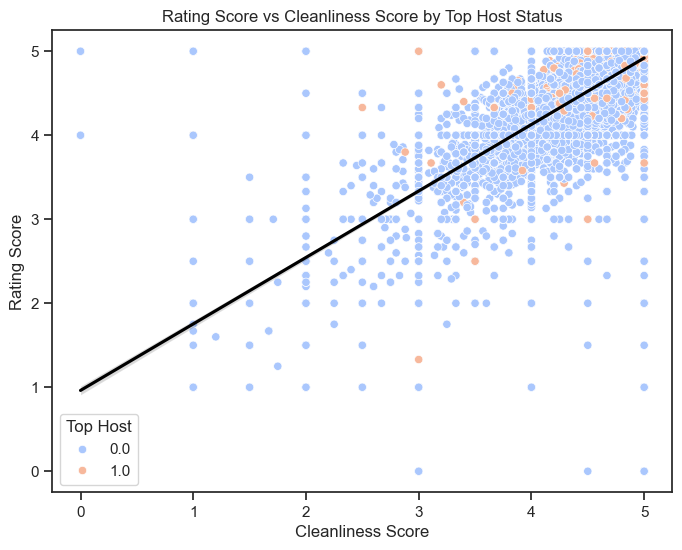

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_airbnb, 
                x='cleanliness_score', 
                y='rating_score', 
                hue='is_top_host',  
                alpha= 1, 
                palette='coolwarm')
sns.regplot(data=df_airbnb, 
            x='cleanliness_score', 
            y='rating_score', 
            scatter=False, 
            color='black')  
plt.title("Rating Score vs Cleanliness Score by Top Host Status")
plt.xlabel("Cleanliness Score")
plt.ylabel("Rating Score")
plt.legend(title='Top Host')
plt.savefig(r"C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\Achievement 6\10-2025 Italian Airbnb\04 Analysis\Visualizations\rating_score_by_top_host.png", 
            dpi=300, bbox_inches='tight')
plt.show()

**Note:**  The initial scatterplot using sns.regplot looked too clustered because most ratings are high, causing the points to overlap. I explored a better visualization with colors by category (e.g., top host status) to make patterns easier to see while still showing the trend.

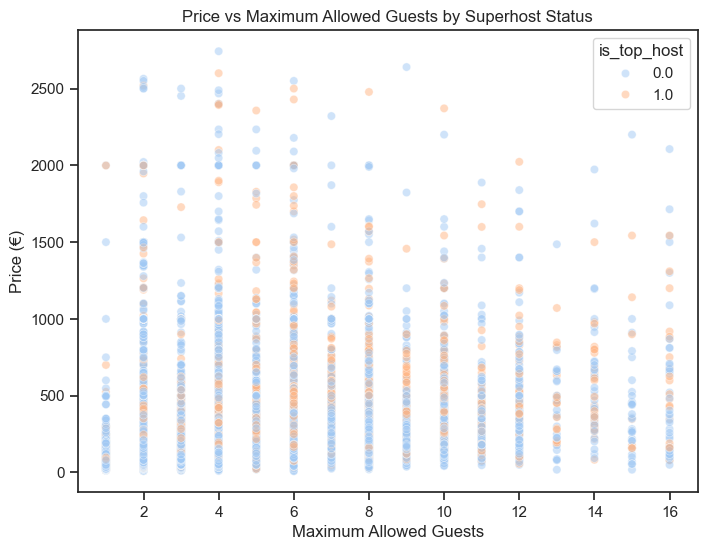

In [59]:
# Scatterplot: Price vs Maximum Allowed Guests
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_airbnb, x='maximum_allowed_guests', y='price', hue='is_top_host', alpha=0.5)
plt.title("Price vs Maximum Allowed Guests by Superhost Status")
plt.xlabel("Maximum Allowed Guests")
plt.ylabel("Price (€)")
plt.savefig(r"C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\Achievement 6\10-2025 Italian Airbnb\04 Analysis\Visualizations\price_vs_max_allowed.png", 
            dpi=300, bbox_inches='tight')
plt.show()

### Scatterplot Interpretations

- **Price vs Maximum Guests:**  
  Listings that accommodate more guests generally have higher prices, as expected. Superhosts are distributed across all price ranges, showing that hosting experience is not strictly tied to property size or price.

- **Rating vs Cleanliness:**  
  Rating scores increase slightly with cleanliness scores. Superhosts tend to have slightly higher ratings overall, indicating a link between host performance and guest satisfaction.

- **Trend Line Insight:**  
  The trend line confirms a positive relationship: higher cleanliness scores generally correspond to slightly higher rating scores. The slope is shallow, reflecting that while cleanliness matters, most listings already have high ratings, limiting variation. This visual reinforces the correlation analysis from the heatmap.


### Pair Plot of Numeric Features

To get an overview of relationships across all numeric features and detect patterns or clusters.

In [24]:
# Subset of numeric variables for clarity
subset_vars = [
    'log_price',
    'rating_score',
    'cleanliness_score',
    'checkin_score',
    'communication_score',
    'location_score',
    'value_for_money_score',
    'host_experience_years',
    'maximum_allowed_guests']

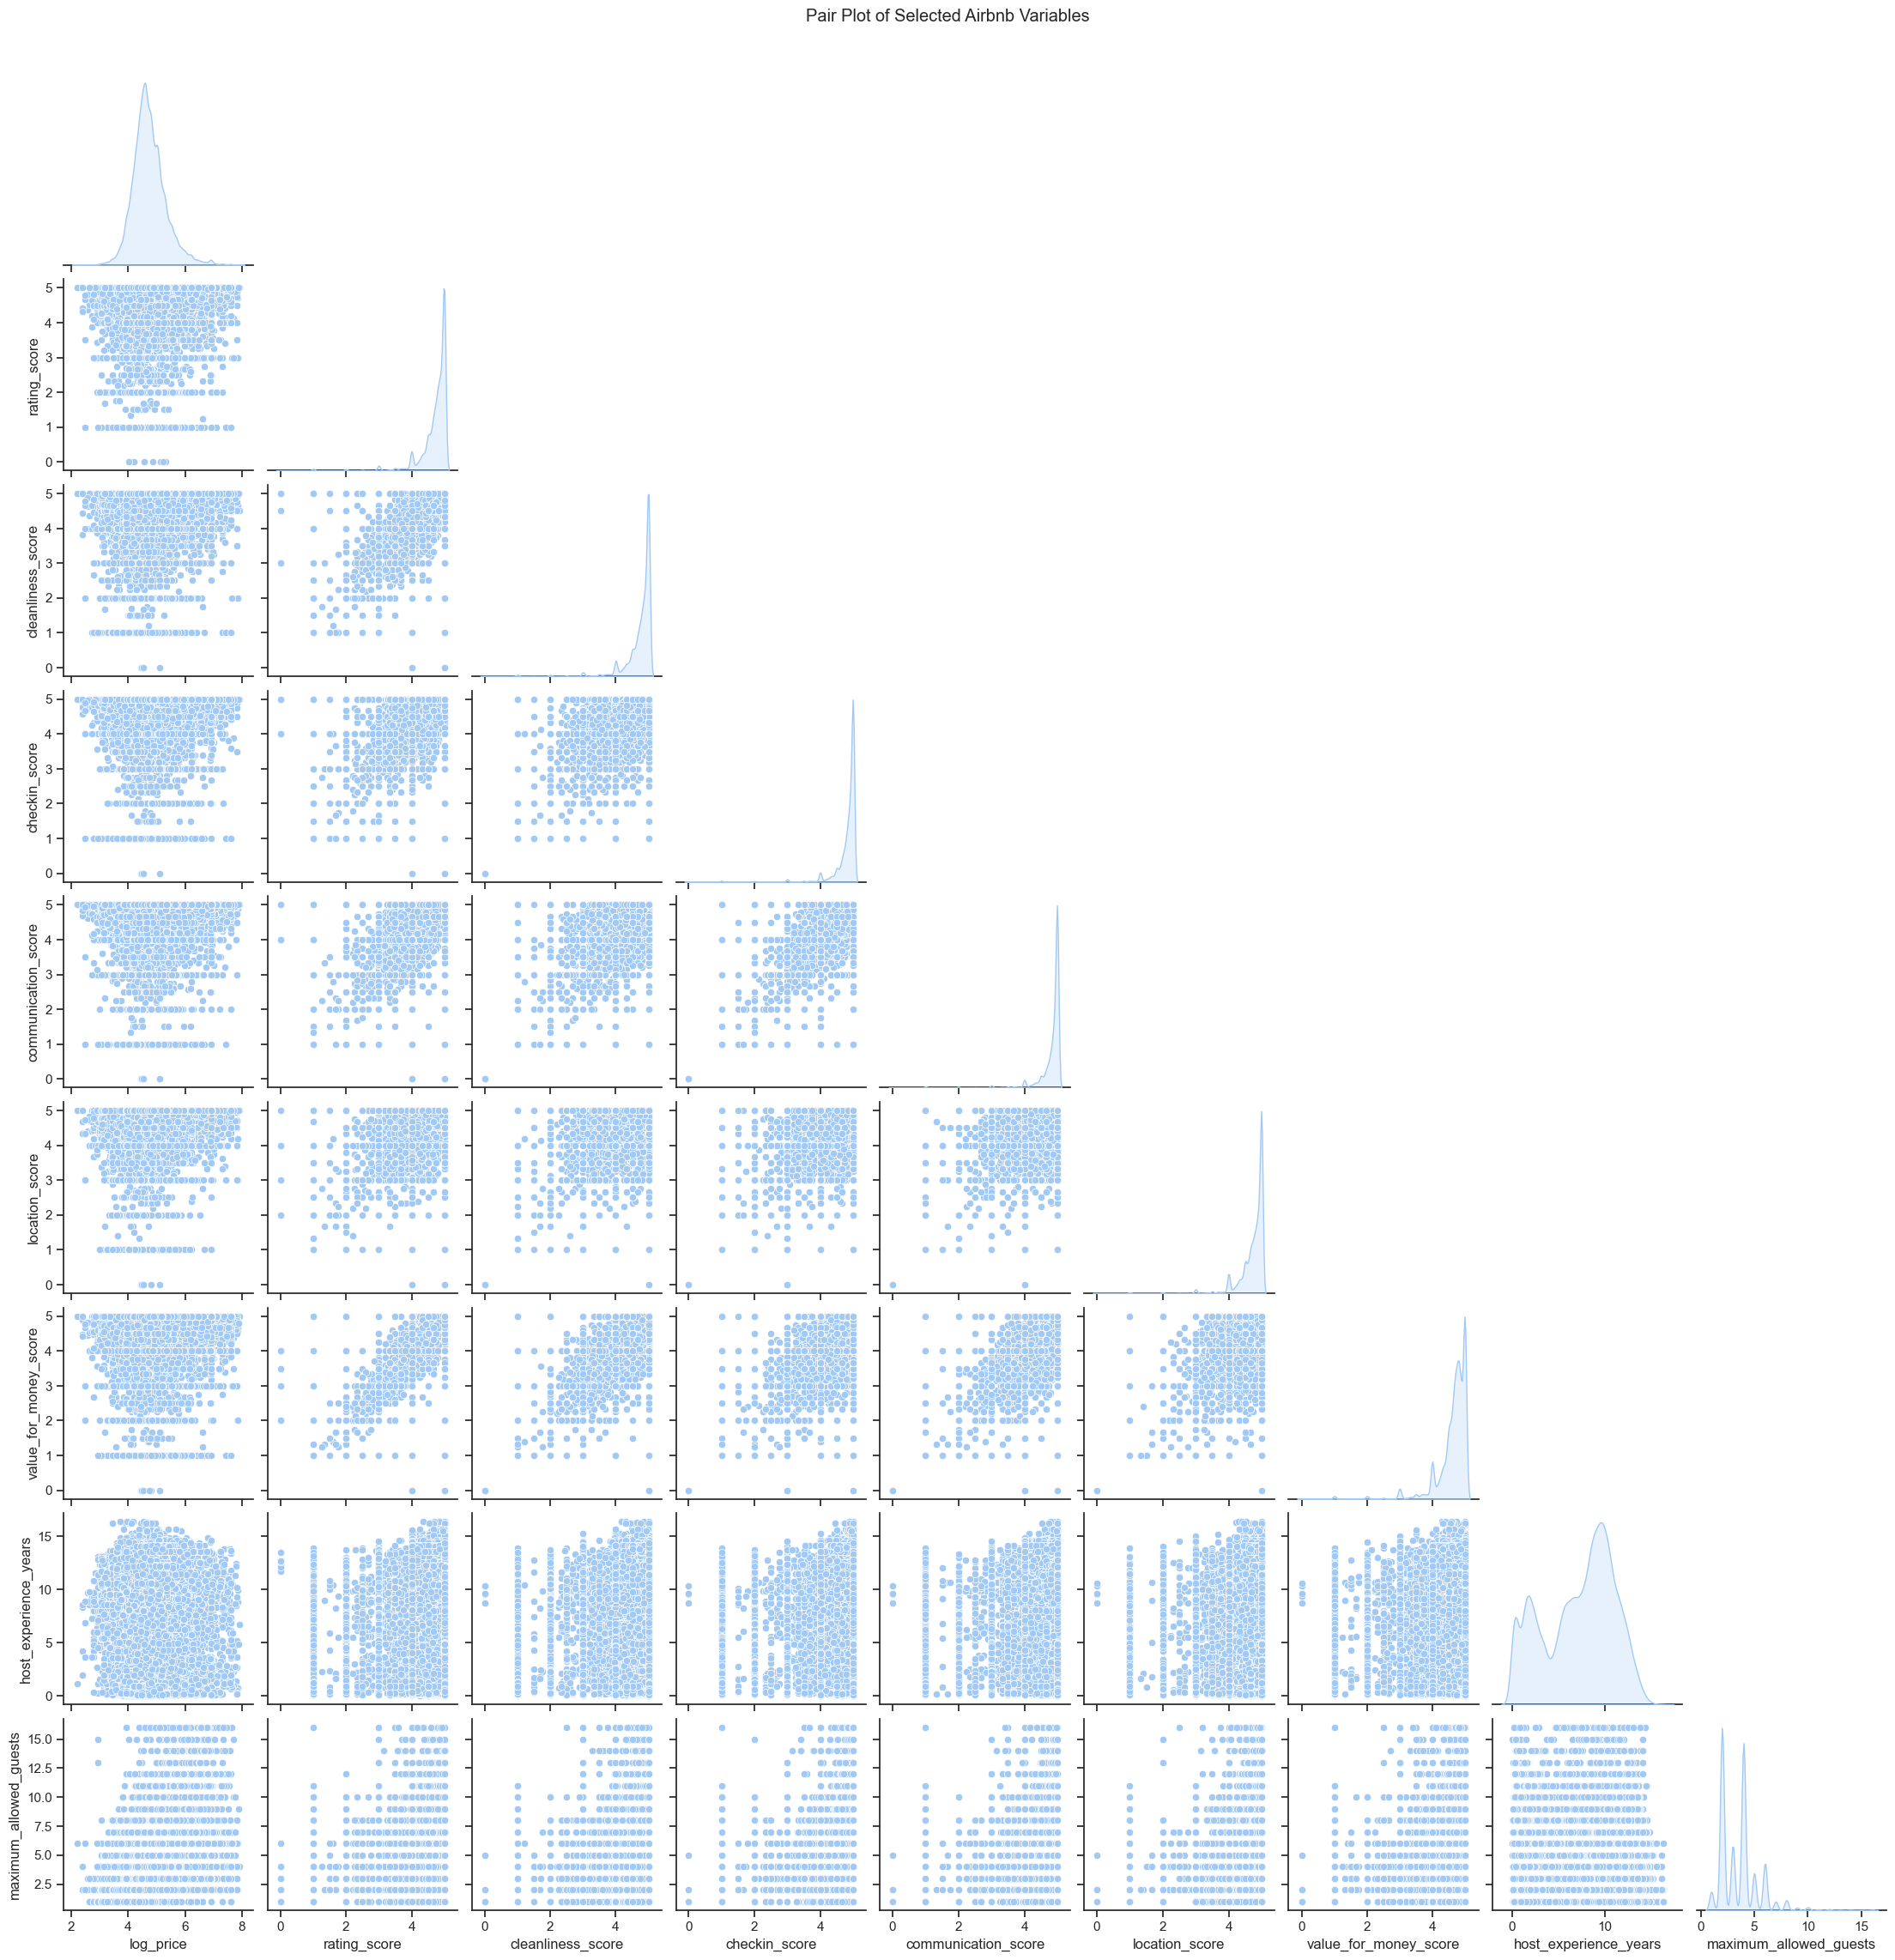

In [60]:
# Pair plot
sns.pairplot(df_airbnb[subset_vars], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Selected Airbnb Variables", y=1.02)
plt.savefig(r"C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\Achievement 6\10-2025 Italian Airbnb\04 Analysis\Visualizations\pairplot1.png", 
            dpi=300, bbox_inches='tight')
plt.show()

### Pair Plot of Key Variables
- I initially tried a pair plot with more variables, but even with a reduced set, the results were visually overwhelming and hard to interpret.
- To improve readability and focus on insights relevant to our hypotheses, I further reduced the subset to the most important variables:
  - `log_price`: to study price patterns
  - `rating_score`: overall guest satisfaction
  - `cleanliness_score`: a key factor influencing ratings
  - `maximum_allowed_guests`: to study the effect of property size
  - `is_top_host`: to analyze host influence on price and ratings
- This approach ensures the plot is both clear and highlights actionable insights.


In [26]:
# Subset the DataFrame to only include relevant variables for hypotheses
pairplot_vars = ['log_price', 'rating_score', 'cleanliness_score', 
                 'maximum_allowed_guests', 'is_top_host']
df_subset = df_airbnb[pairplot_vars]

<Figure size 1200x1000 with 0 Axes>

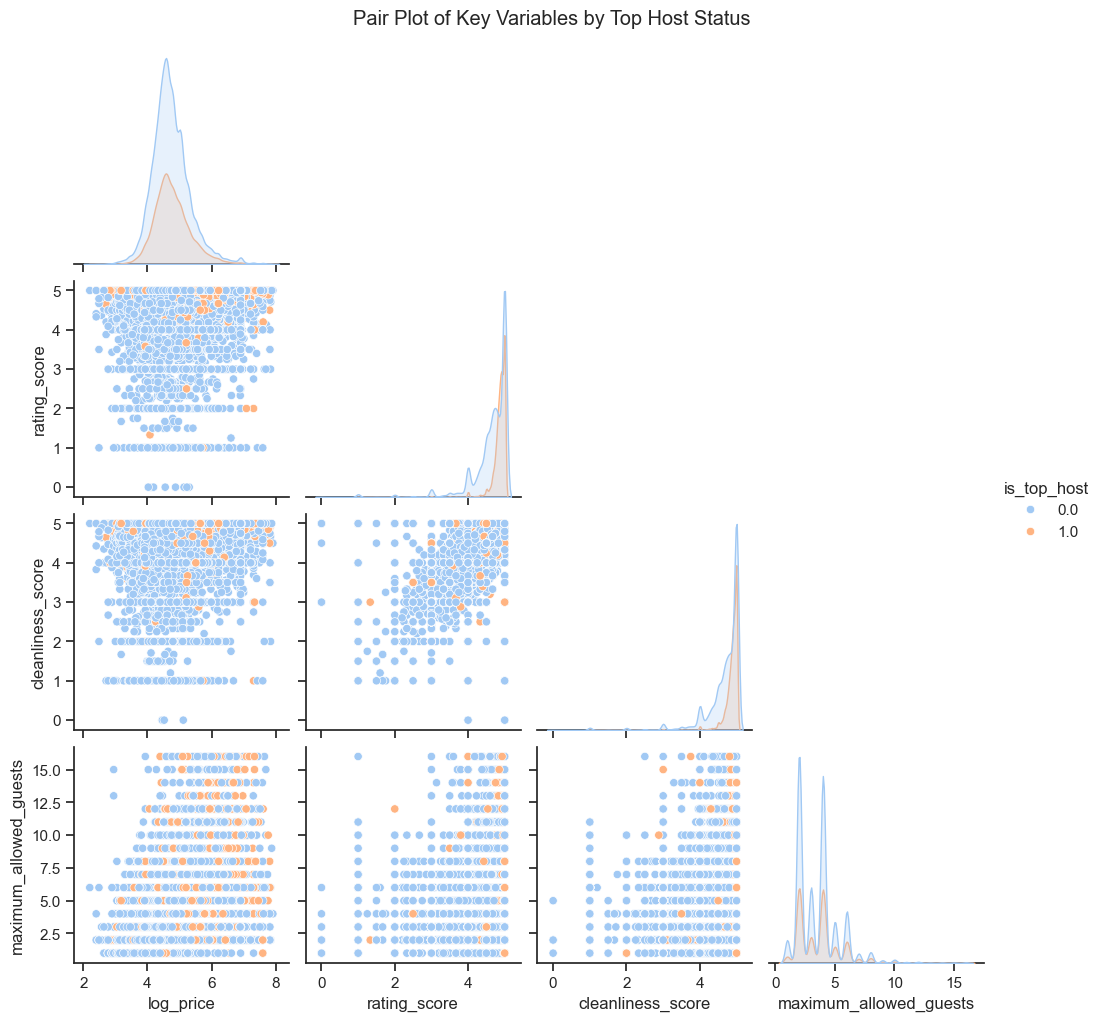

In [61]:
# Create pair plot
sns.set(style="ticks", palette="pastel")
plt.figure(figsize=(12,10))
sns.pairplot(df_subset, hue='is_top_host', diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Key Variables by Top Host Status", y=1.02)
plt.savefig(r"C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\Achievement 6\10-2025 Italian Airbnb\04 Analysis\Visualizations\Pairplot_key_variables.png", 
            dpi=300, bbox_inches='tight')
plt.show()

### Interpretation
- By focusing on the most relevant variables, the pair plot is easier to read and interpret.
- `log_price` shows some spread with `maximum_allowed_guests`, indicating larger properties tend to cost more.
- `rating_score` and `cleanliness_score` are positively related, confirming earlier scatterplot observations.
- `is_top_host` shows slight separation in `log_price` and `rating_score`, suggesting Superhosts may achieve slightly higher prices and ratings.
- This subset approach allows us to visualize relationships clearly without overwhelming clutter.


## Categorical Plot: Log Price vs Maximum Allowed Guests by Top Host Status

In this step, I focus on the variables most relevant to my hypotheses: property size (`maximum_allowed_guests`), price (`log_price`), and host quality (`is_top_host`). Previous pair plots were too crowded, so I reduced the variables to focus on the most meaningful relationships.

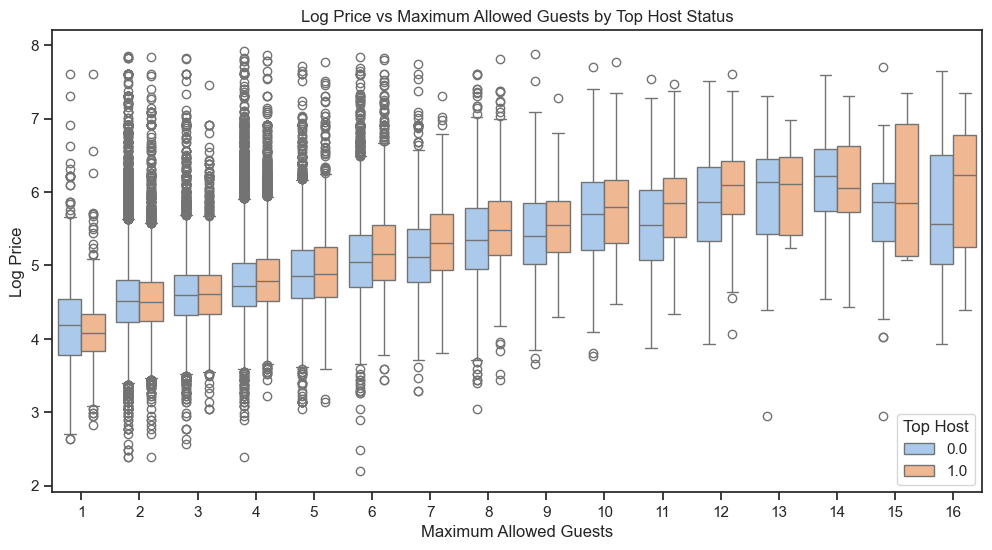

In [62]:
# Categorical plot: log_price vs maximum_allowed_guests, colored by top host status
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_airbnb, 
    x='maximum_allowed_guests', 
    y='log_price', 
    hue='is_top_host', 
    palette='pastel'
)
plt.title("Log Price vs Maximum Allowed Guests by Top Host Status")
plt.xlabel("Maximum Allowed Guests")
plt.ylabel("Log Price")
plt.legend(title='Top Host')
plt.savefig(r"C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\Achievement 6\10-2025 Italian Airbnb\04 Analysis\Visualizations\logprice_vs_max_allowed_guests.png", 
            dpi=300, bbox_inches='tight')
plt.show()

### Interpretation of Boxplot / Categorical Plot
- Properties that accommodate more guests generally have higher prices, which aligns with expectations.
- Superhosts (`is_top_host=1`) tend to achieve slightly higher prices across guest capacities.
- Price variability is larger for bigger properties, indicating diverse pricing strategies for larger listings.
- The box represents the middle 50% of log prices for listings in each guest capacity category, with the line inside indicating the median.
- The whiskers extend to 1.5 times the interquartile range (IQR) from the lower and upper quartiles.
- Dots outside the whiskers are outliers, showing listings with unusually high or low log prices for that number of guests.
- This categorical plot reinforces the pair plot findings and demonstrates why I chose to focus on these key variables for hypothesis testing.

### **Revisiting Questions & Early Insights** 

#### 1. What factors increase the likelihood of a host becoming a superhost?
- Based on current visual exploration, no direct patterns were isolated yet.
- Future analysis could examine relationships with host experience, total listings, and review scores.

#### 2. How does host experience (years active) affect ratings and reviews?
- Longer-hosting experience slightly correlates with higher ratings and more reviews.
- Most listings already have high scores, limiting variation.

#### 3. Are there differences in pricing across cities and neighborhoods?
- Initial scatterplots and categorical plots show price varies by guest capacity and property type.
- City- and neighborhood-level differences will require deeper spatial analysis.

#### 4. What listing characteristics (number of beds, property type, max guests) are associated with higher prices?
- Larger properties (more beds/bedrooms, higher guest capacity) generally command higher prices.
- Superhosts tend to achieve slightly higher prices across all property sizes.

#### 5. Can we identify clusters of listings based on price, ratings, and geolocation?
- Pair plots and scatterplots suggest potential clustering by price and ratings.
- Full dataset is too large to visualize all points; subsetting or dimensionality reduction will help explore clusters later.

#### 6. How do seasonality and location impact price and demand?
- Seasonal effects weren’t explored in these visuals yet.
- Location (via coordinates) will be addressed in the next spatial analysis task.

#### New Questions Arising from Visual Exploration
- Do rating sub-scores (cleanliness, communication, accuracy) impact price or superhost status?
- Are there interactions between guest capacity, property type, and seasonality that influence price?

---

**Note:** Even with a reduced number of variables for pair plots and categorical plots, the visualizations were still overwhelming. I decided to focus on the most relevant variables that align with my hypothesis testing goals.


## **Hypotheses**

Based on the visual exploration and descriptive statistics conducted so far, I define the following hypotheses to be tested later:

### H1: Host Experience and Ratings
- **Hypothesis:** Hosts with more years of experience tend to have higher overall ratings and more reviews.
- **Rationale:** Visual analysis of `host_experience_years` versus `rating_score` and `total_reviews` suggested a slight positive trend.

### H2: Superhost Status and Price
- **Hypothesis:** Superhosts (`is_top_host = 1`) achieve higher prices on average compared to non-superhosts.
- **Rationale:** Categorical plots and scatterplots showed that superhosts generally maintain slightly higher pricing across properties of similar size.

### H3: Property Size and Price
- **Hypothesis:** Listings with more beds, bedrooms, or maximum allowed guests have higher prices.
- **Rationale:** Scatterplots and pair plots indicate a positive relationship between size/capacity variables and `price`.

### H4: Ratings Sub-scores and Overall Rating
- **Hypothesis:** Higher sub-scores for cleanliness, communication, accuracy, and check-in are associated with higher overall rating scores.
- **Rationale:** Visual exploration confirmed a slight positive correlation between sub-scores and `rating_score`.

### H5: Guest Capacity, Property Type, and Pricing
- **Hypothesis:** Larger properties (more guests) and certain property types (e.g., apartments vs. houses) command higher prices.
- **Rationale:** Categorical plots suggested price variability across property types and guest capacities.

### H6: Seasonality Impact on Price
- **Hypothesis:** Prices vary by season, with higher prices in high-demand seasons (summer, holidays).
- **Rationale:** Seasonal information will be tested later, though it was not fully explored in the current visuals.

---

**Note:** These hypotheses align directly with the questions defined earlier and will guide the formal testing and further analysis in upcoming tasks.


### Exporting Visualizations

In [33]:
# Folder to save the visuals
output_folder = r"C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\Achievement 6\10-2025 Italian Airbnb\04 Analysis\Visualizations"
os.makedirs(output_folder, exist_ok=True)

To organize my project outputs, I created a dedicated folder named **"Visualizations"** within my project directory. For each visual I generated in this notebook, I added a line of code to save the figure directly to this folder using `plt.savefig()`. 

This approach ensures that all charts and plots are neatly stored in one location, making it easier to include them in reports, presentations, or portfolio submissions. Each saved visual maintains high resolution (`dpi=300`) and a clean layout (`bbox_inches='tight'`), preserving the quality of the figures for further use.